Name - Aditya Kothari 

Roll no. - I028

Batch - B1

Aim - To Determine DoG and LoG for the given images.

In [11]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

Loading image from skimage

In [12]:
img = data.chelsea()

array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102],
        ...,
        [ 45,  27,  13],
        [ 45,  27,  13],
        [ 45,  27,  13]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104],
        ...,
        [ 46,  29,  13],
        [ 45,  29,  13],
        [ 47,  30,  14]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109],
        ...,
        [ 48,  28,  17],
        [ 49,  29,  18],
        [ 50,  30,  19]],

       ...,

       [[ 92,  58,  30],
        [105,  71,  43],
        [132,  98,  71],
        ...,
        [172, 145, 138],
        [172, 145, 138],
        [172, 145, 138]],

       [[128,  92,  60],
        [139, 103,  71],
        [134,  95,  64],
        ...,
        [166, 142, 132],
        [166, 142, 132],
        [167, 143, 133]],

       [[139, 103,  71],
        [127,  88,  57],
        [125,  86,  53],
        ...,
        [161, 137, 127],
        [161, 137, 127],
        [162, 138, 128]]], dtype=uint8)
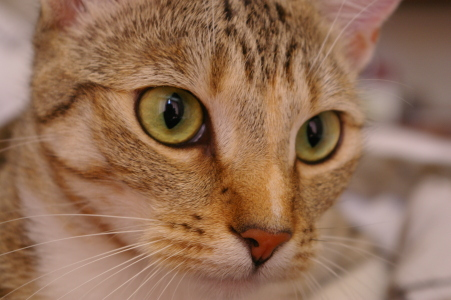

In [10]:
img

Converting image from RGB to Grayscale

In [13]:
img_g = rgb2gray(img)

Adding gaussian blur to the image

In [40]:
b_sigma1 = cv2.GaussianBlur(img_g, (31,31), 1)
b_sigma2 = cv2.GaussianBlur(img_g, (31,31), 2)
b_sigma3 = cv2.GaussianBlur(img_g, (31,31), 3)
b_sigma4 = cv2.GaussianBlur(img_g, (31,31), 4)
# b_sigma7 = cv2.GaussianBlur(img_g, (31,31), 7)
b_sigma9 = cv2.GaussianBlur(img_g, (31,31), 9)

Calculating the difference of gaussian

In [18]:
dog1_7 = b_sigma1 - b_sigma7
dog2_7 = b_sigma2 - b_sigma7
dog3_7 = b_sigma3 - b_sigma7
dog4_7 = b_sigma4 - b_sigma7

Calculating the difference of gaussian (Largest sigma = 9)

In [41]:
dog1_9 = b_sigma1 - b_sigma9
dog2_9 = b_sigma2 - b_sigma9
dog3_9 = b_sigma3 - b_sigma9
dog4_9 = b_sigma4 - b_sigma9

Plotting the images together to see the differences

Text(0.5, 1.0, 'Sigma = 9')

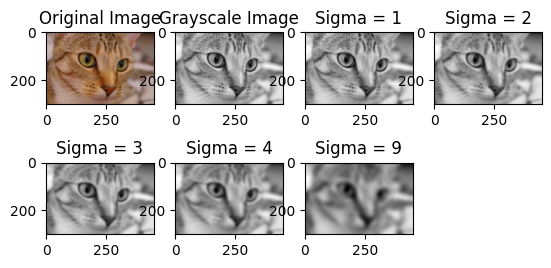

In [42]:
plt.subplot(3,4,1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(3,4,2)
plt.imshow(img_g,cmap = "gray")
plt.title("Grayscale Image")
plt.subplot(3,4,3)
plt.imshow(b_sigma1,cmap = "gray")
plt.title("Sigma = 1")
plt.subplot(3,4,4)
plt.imshow(b_sigma2,cmap = "gray")
plt.title("Sigma = 2")
plt.subplot(3,4,5)
plt.imshow(b_sigma3,cmap = "gray")
plt.title("Sigma = 3")
plt.subplot(3,4,6)
plt.imshow(b_sigma4,cmap = "gray")
plt.title("Sigma = 4")
plt.subplot(3,4,7)
# plt.imshow(b_sigma7,cmap = "gray")
# plt.title("Sigma = 7")
plt.imshow(b_sigma9,cmap = "gray")
plt.title("Sigma = 9")

Applying threshold
(If difference is small, the edge not considered.)

In [36]:
mx = np.max(dog1_7)
th = mx*0.2
dog1_7[np.abs(dog1_7)>th] = 255
dog2_7[np.abs(dog2_7)>th] = 255
dog3_7[np.abs(dog3_7)>th] = 255
dog4_7[np.abs(dog4_7)>th] = 255

In [43]:
mx = np.max(dog1_9)
th = mx*0.2
dog1_9[np.abs(dog1_9)>th] = 255
dog2_9[np.abs(dog2_9)>th] = 255
dog3_9[np.abs(dog3_9)>th] = 255
dog4_9[np.abs(dog4_9)>th] = 255

Plotting the DoG images (Largest sigma = 7)

Text(0.5, 1.0, 'DoG 4-7')

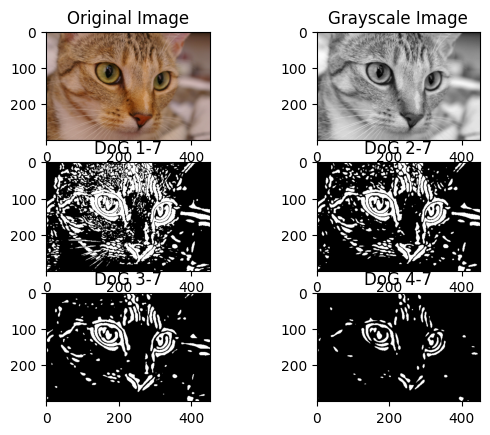

In [45]:
plt.subplot(3,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(3,2,2)
plt.imshow(img_g,cmap = "gray")
plt.title("Grayscale Image")
plt.subplot(3,2,3)
plt.imshow(dog1_7,cmap = "gray")
plt.title("DoG 1-7")
plt.subplot(3,2,4)
plt.imshow(dog2_7,cmap = "gray")
plt.title("DoG 2-7")
plt.subplot(3,2,5)
plt.imshow(dog3_7,cmap = "gray")
plt.title("DoG 3-7")
plt.subplot(3,2,6)
plt.imshow(dog4_7,cmap = "gray")
plt.title("DoG 4-7")

Plotting the DoG images (Largest sigma = 9)

Text(0.5, 1.0, 'DoG 4-9')

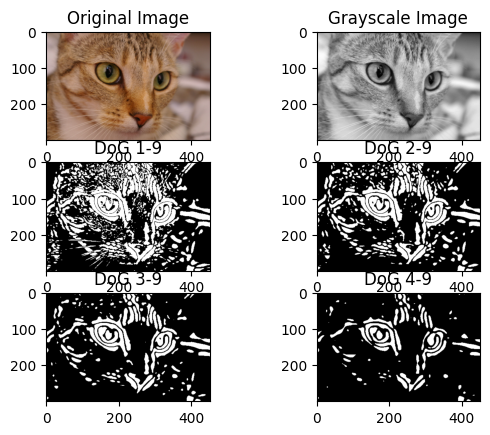

In [46]:
plt.subplot(3,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(3,2,2)
plt.imshow(img_g,cmap = "gray")
plt.title("Grayscale Image")
plt.subplot(3,2,3)
plt.imshow(dog1_9,cmap = "gray")
plt.title("DoG 1-9")
plt.subplot(3,2,4)
plt.imshow(dog2_9,cmap = "gray")
plt.title("DoG 2-9")
plt.subplot(3,2,5)
plt.imshow(dog3_9,cmap = "gray")
plt.title("DoG 3-9")
plt.subplot(3,2,6)
plt.imshow(dog4_9,cmap = "gray")
plt.title("DoG 4-9")

Laplacian of Gaussian

In [57]:
image = cv2.imread(r"/content/pool.png", cv2.IMREAD_ANYCOLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_b = cv2.GaussianBlur(image, (3,3), 0)
image_gray = cv2.cvtColor(image_b, cv2.COLOR_RGB2GRAY)
f_image = cv2.Laplacian(image_gray, cv2.CV_16S, ksize = 3) #16 point signed integer

Plotting the pool images

Text(0.5, 1.0, 'Laplacian of Gaussian')

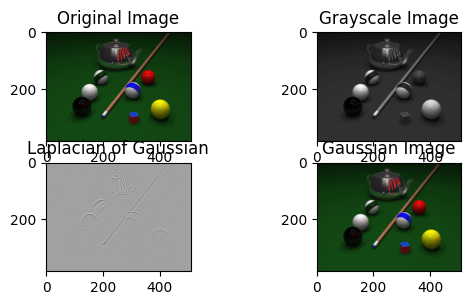

In [58]:
plt.subplot(3,2,1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(3,2,2)
plt.imshow(image_gray,cmap = "gray")
plt.title("Grayscale Image")
plt.subplot(3,2,4)
plt.imshow(image_b, cmap = "gray")
plt.title("Gaussian Image")
plt.subplot(3,2,3)
plt.imshow(f_image,cmap = "gray")
plt.title("Laplacian of Gaussian")

Thresholding of the Pool image

In [63]:
f_image_th = f_image.copy()
mx = np.max(f_image)
th = mx*0.2
f_image_th[np.abs(f_image_th)>th] = 255

Text(0.5, 1.0, 'Laplacian of Gaussian Threshold')

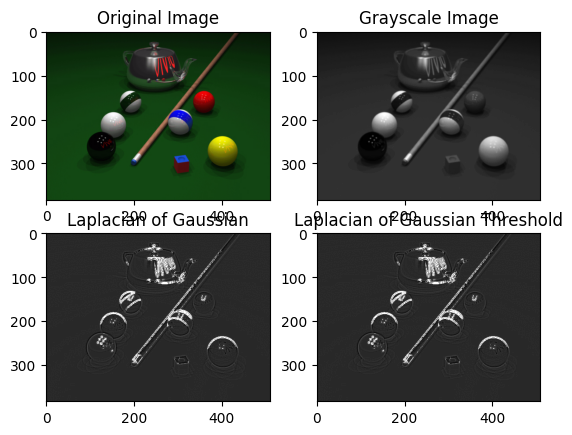

In [64]:
plt.subplot(2,2,1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(2,2,2)
plt.imshow(image_gray,cmap = "gray")
plt.title("Grayscale Image")
plt.subplot(2,2,3)
plt.imshow(f_image,cmap = "gray")
plt.title("Laplacian of Gaussian")
plt.subplot(2,2,4)
plt.imshow(f_image_th,cmap = "gray")
plt.title("Laplacian of Gaussian Threshold")

**Conclusion :** Difference of Gaussian is calculated for the given image using sigma = 1,2,3,4,7. It's observed that for DoG of 1 and 7, fine details of the object are detected. However, if DoG for higher sigma values is calculated, the images show fewer number of fine edges.

LoG is used to detect the edges of the given image "Pool.png". It is observed that LoG highlights boundaries of the objects in the image.

If the largest sigma value is increased from 7 to 9, no difference is observed, this is because the size of filter is smaller than the required changes in element values.

If sigma value is changed from 4 to 5, then corresponding DoG shows fewer details than the DoG for sigma value of 4 and 7.